The Black-Scholes formula provides a theoretical estimate for the price of European-style options, using the assumption of a lognormally distributed underlying asset and continuous trading. The model leads to a partial differential equation which, under certain boundary conditions, is solved to give the option's price.

### Black-Scholes Formula for a European Call an Put Option

The price of a European call option $C$ is given by:

$$ c(t) = S(t) \cdot N(d_1) - e^{-r(T-t)} X\cdot N(d_2) $$


Similarly, the price of a European put option $p(t)$ is given by:

$$ p(t) = e^{-r(T-t)} X \cdot N(-d_2) - S(t) \cdot N(-d_1) $$


where:

- $S(t)$: Stock price at time $t$
- $X$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $N(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / X) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns



### Problem 1

A European call option on a non-dividend paying stock has a strike price of $50 and will expire in 6 months. The current stock price is $48, the annual risk-free interest rate is 5%, and the stock's annual volatility is 20%. Calculate the price of the call option using the Black-Scholes formula.

#### Given:

- Current stock price, $\$S(0)$ = $\$48$
- Strike price, $\$X = \$50$
- Time to expiration, $T = 0.5$ years
- Risk-free interest rate, $r = 0.05$
- Volatility, $\sigma = 0.20$ 




In [9]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European call option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the call option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European put option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the put option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    put_price = -(S0 * norm.cdf(-d1)) + (X * np.exp(-r * T) * norm.cdf(-d2))
    return put_price

# Given data
S0 = 50    # Current stock price
X = 50       # Strike price
T = 0.5      # Time to expiration in years
r = 0.01   # Risk-free interest rate 
sigma = 0.10 # Volatility of the stock 

# Calculate the call option price
call_option_price = black_scholes_call(S0, X, T, r, sigma)
put_option_price = black_scholes_put(S0, X, T, r, sigma)
call_option_price, put_option_price

(1.5348652546134858, 1.2854892142476047)

Volatility is a statistical measure of the dispersion of returns for a given security or market index. To estimate the historical volatility of a stock, we can use the daily stock prices over a certain period.

### Estimating Realized Volatility

Given historical stock prices $S(n)$ for $N+1$ days, we can estimate daily returns $R_n$ as:

$$ R_n = \frac{S(n) - S(n - 1)}{S(n - 1)} $$

Then, we compute the daily mean return $\hat{\mu}_d$ and daily volatility $\hat{\sigma}_d$:

$$ \hat{\mu}_d = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + R_n) $$
$$ \hat{\sigma}_d = \sqrt{\frac{1}{N - 1} \sum_{n=1}^{N} (\ln(1 + R_n) - \hat{\mu}_d)^2} $$

To annualize these estimates, assuming 252 trading days in a year, the formulas are:

$$ \hat{\mu} = 252 \hat{\mu}_d $$
$$ \hat{\sigma} = \hat{\sigma}_d \sqrt{252} $$

These estimates provide insights into the average return and the risk or uncertainty of the stock's return, which are pivotal for financial modeling and risk management.


In [15]:
import yfinance as yf
import numpy as np

def calculate_realized_volatility(stock_ticker, period="1y"):
    """
    Calculate the realized volatility for a given stock ticker using historical price data.

    Parameters:
    stock_ticker (str): The stock ticker symbol for which to calculate volatility.
    period (str): The period over which to calculate volatility (default is "1y" for one year).

    Returns:
    float: The annualized realized volatility.
    """
    # Download historical data for the stock
    data = yf.download(stock_ticker, period=period, interval="1d")

    # Calculate daily returns
    daily_returns = data['Adj Close'].pct_change().dropna()

    # Calculate the daily mean return
    daily_mean_return = np.mean(np.log(1 + daily_returns))

    # Calculate the daily volatility
    daily_volatility = np.sqrt(np.mean((np.log(1 + daily_returns) - daily_mean_return)**2))

    # Annualize the mean return and volatility
    annualized_volatility = daily_volatility * np.sqrt(252)

    return annualized_volatility


stock_ticker = 'AAPL'  # Apple Inc.
realized_volatility = calculate_realized_volatility(stock_ticker, period="5y")
print(f"The realized annualized volatility for {stock_ticker} is: {realized_volatility}")

[*********************100%%**********************]  1 of 1 completed

The realized annualized volatility for AAPL is: 0.3171090323411349


The following table presents a selection of call options for Apple Inc. (AAPL), which is currently trading at $\$189$. These options have an expiration date of January 17, 2025 with $r=5.31\%$ 	

| Strike Price | Current Price | 
|--------------|------------|
| $165.00      | $36.56     | 
| $170.00      | $32.97     | 
| $175.00      | $29.73     | 
| $180.00      | $25.75     | 
| $185.00      | $22.70     |
| $190.00      | $19.86     | 
| $195.00      | $17.00     |
| $200.00      | $14.50     | 
| $205.00      | $12.61     | 
| $210.00      | $10.23     | 




In [16]:
from datetime import datetime
def calculate_days_to_expiration(current_date, expiration_date):
    """
    Calculate the number of days from the current date to the expiration date.

    Parameters:
    current_date (str): Current date in the format 'YYYY-MM-DD'
    expiration_date (str): Expiration date in the format 'YYYY-MM-DD'

    Returns:
    int: Number of days from the current date to the expiration date
    """
    # Convert strings to datetime objects
    current_date = datetime.strptime(current_date, '%Y-%m-%d')
    expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d')
    
    # Calculate the difference in days
    days_to_expiration = (expiration_date - current_date).days
    
    return days_to_expiration

current_date = '2024-02-07'  # February 7, 2024
expiration_date = '2025-01-17'  # January 17, 2025
days_to_expiration = calculate_days_to_expiration(current_date, expiration_date)
T=days_to_expiration/366
T

0.9426229508196722

In [11]:
# Given parameters
S0 = 189  # Current stock price of AAPL
r = 0.0531  # Risk-free interest rate (annualized) Currently # 5.31
T = days_to_expiration / 365  # Time to expiration in years

# Table of options
options = [
    {"Strike Price": 165.00, "Volatility": 20},
    {"Strike Price": 170.00, "Volatility": 20},
    {"Strike Price": 175.00, "Volatility": 20},
    {"Strike Price": 180.00, "Volatility": 20},
    {"Strike Price": 185.00, "Volatility": 20},
    {"Strike Price": 190.00, "Volatility": 20},
    {"Strike Price": 195.00, "Volatility": 20},
    {"Strike Price": 200.00, "Volatility": 20},
    {"Strike Price": 205.00, "Volatility": 20},
    {"Strike Price": 210.00, "Volatility": 20},
]

# Calculate and print the Black-Scholes price for each option
for option in options:
    X = option["Strike Price"]
    sigma = option["Volatility"] / 100  # Convert percentage to decimal
    black_scholes_price = black_scholes_call(S0, X, T, r, sigma)
    print(f"Strike Price: ${X}, Black-Scholes Price: ${black_scholes_price:.2f}")

Strike Price: $165.0, Black-Scholes Price: $35.10
Strike Price: $170.0, Black-Scholes Price: $31.37
Strike Price: $175.0, Black-Scholes Price: $27.88
Strike Price: $180.0, Black-Scholes Price: $24.62
Strike Price: $185.0, Black-Scholes Price: $21.60
Strike Price: $190.0, Black-Scholes Price: $18.85
Strike Price: $195.0, Black-Scholes Price: $16.34
Strike Price: $200.0, Black-Scholes Price: $14.09
Strike Price: $205.0, Black-Scholes Price: $12.08
Strike Price: $210.0, Black-Scholes Price: $10.29


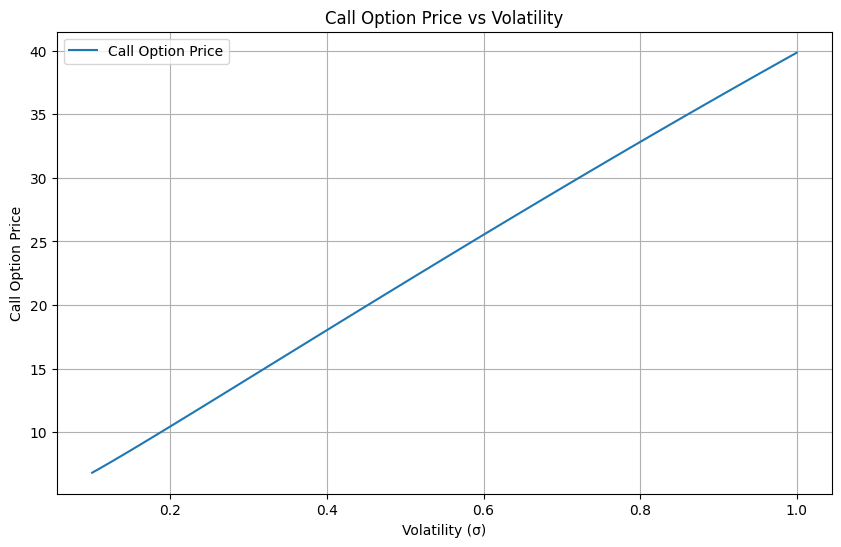

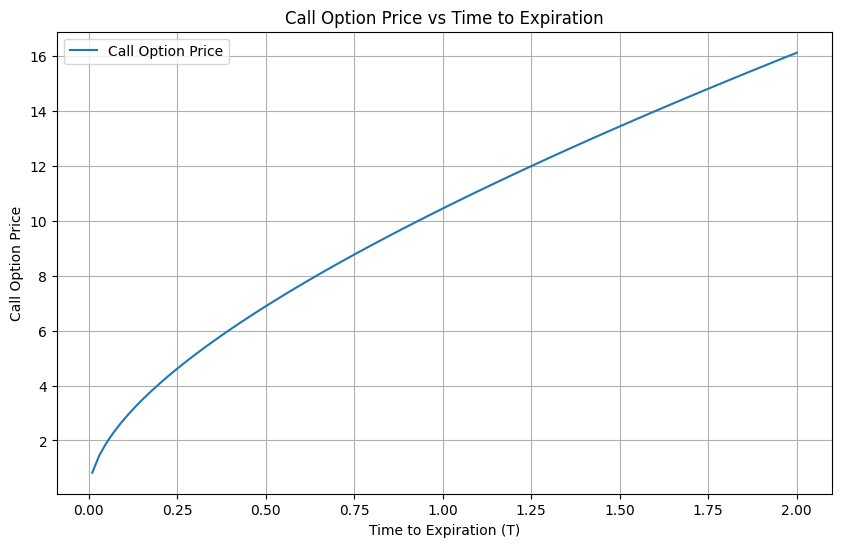

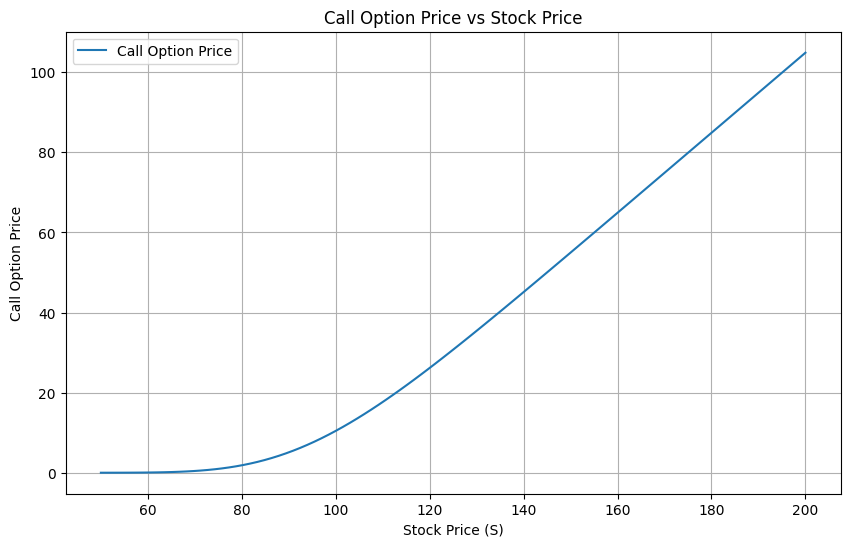

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Given constants for the option
S0 = 100  # Current stock price
X = 100    # Strike price
T = 1  # Time to expiration in years
r = 0.05  # Risk-free interest rate (annual)
sigma = 0.20  # Volatility of the stock (annual)

# Graph 1: Change in option price due to changing volatility
sigmas = np.linspace(0.1, 1., 100)
prices_sigma = black_scholes_call(S0, X, T, r, sigmas)

plt.figure(figsize=(10, 6))
plt.plot(sigmas, prices_sigma, label='Call Option Price')
plt.xlabel('Volatility (σ)')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Graph 2: Change in option price due to changing time to expiration
times = np.linspace(0.01, 2, 100)  # Time from almost now to two years
prices_time = black_scholes_call(S0, X, times, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(times, prices_time, label='Call Option Price')
plt.xlabel('Time to Expiration (T)')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs Time to Expiration')
plt.legend()
plt.grid(True)
plt.show()

# Graph 3: Change in option price due to changing stock price
stock_prices = np.linspace(50, 200, 100)
prices_stock = black_scholes_call(stock_prices, X, T, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, prices_stock, label='Call Option Price')
plt.xlabel('Stock Price (S)')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs Stock Price')
plt.legend()
plt.grid(True)
plt.show()


### Problem 2

A mutual fund has reported the following annual returns over a period of six years: 18%, 22%, -12%, 9%, 15%, and -7%.

1. Calculate the arithmetic mean of the returns. Is this indicative of the actual performance an investor would experience over the six years?
2. Compute the final value of a $100 investment after the six-year period, considering the sequence of returns.
3. Compute the final value of a $100 investment after the six-year period using the arithmetic mean of the returns.
4. What would be the annual return equivalent to the final value obtained from question 2?
5. What should the average return a fund manager should report? Should it be "The average of the returns per year that we have realized in the last 6 years" or "The average return realized by someone wh invested with us for the last 6 years"?


### Problem 2 Solution

1. **Arithmetic Mean of Returns**
The arithmetic mean is calculated as follows:

$$
\text{Arithmetic Mean} = \frac{18\% + 22\% - 12\% + 9\% + 15\% - 7\%}{6} = 7.5\%
$$

However, this does not consider the compounding effect of the investment.

2. **Final Value of a $100 Investment**
Compounding the returns:

$$
\text{Final Value} = \$100 \times (1.18) \times (1.22) \times (0.88) \times (1.09) \times (1.15) \times (0.93) = 147.68
$$

3. **Final Value Using Arithmetic Mean**
Using the arithmetic mean to estimate the final value:

$$
\text{Final Value} = \$100 \times (1.075)^6=154.33
$$

4. **Equivalent Annual Return**
To find the annual return equivalent:

$$
\text{Equivalent Annual Return} = \left(\frac{147.68}{\$100}\right)^{\frac{1}{6}} - 1=0.061
$$

5. **Average Return Reporting**
The fund manager should report the geometric mean of the returns, which is the actual average return realized by someone who invested over the last 6 years. It takes into account the compounding of returns.

$$ \hat{\mu}_d = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + R_n) $$


## Black Scholes PDE
The Black-Scholes Partial Differential Equation (PDE) is a tool in finance for pricing  options. It is derived under the assumption of a lognormally distributed underlying asset price, no arbitrage, and continuous hedging.

The Black-Scholes PDE is given by:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

Where:
- $V(S,t)$ is the option price as a function of stock price $S$ and time $t$.
- $\sigma$ is the volatility of the stock's returns.
- $r$ is the risk-free interest rate.





### Derivation Outline:

1. **Portfolio Construction:**
   Construct a portfolio $\Pi$ consisting of one short option (put or call) and $\Delta$ units of the underlying asset:

   $$ \Pi = -V + \frac{dV}{dS} S $$

   where $V(S_t, t)$ is the option value, and $S$ is the asset price.

2. **Portfolio Dynamics:**
   The change in portfolio value over an infinitesimally small time $dt$ is:

   $$ d\Pi = -dV + \frac{dV}{dS} dS $$

3. **Option Price Dynamics:**
   By Ito's lemma, we have

   $$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t $$

4. **Asset Price Dynamics:**
   We assume underlying asset follows geometric Brownian motion:

   $$ dS = \mu S dt + \sigma S dW_t $$

   i.e. $\mu(S_t, t)=\mu S$ and $\sigma(S_t, t)=\sigma S$

5. **Substituting and Simplifying:**
   Substitute $dV$  into $d\Pi$ and $\mu S dt + \sigma S dW_t$ for $dS$ leading to:

  $$
  d\Pi = -\left(\left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW_t \right) + \frac{dV}{dS} (\mu S dt + \sigma S dW_t).
  $$
  
  Simplifying we get:

$$ d\Pi = \left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
   

6. **Risk Free Assumption**
Since all risk has vanished from our equation we assume
$$d\Pi =r\Pi  dt =r \left( -V + \frac{dV}{dS} S \right) dt$$
where $r$ is the risk free rate. 

7. **Putting it all Together**
We have thus: 
$$r \left( -V + \frac{dV}{dS} S \right) dt=\left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
and after simplifying, we get the Black Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

### Problem 3

Suppose $dS_t=4S^2_t dt+ 6SdW_t$. Find the corresponding black scholes equation.


### General Black Scholes PDE:

Here we do not assume our stock evolves according to a geometric brownian motion:   $ dS = \mu S dt + \sigma(S_t, t) dW_t $, but can be more generally:

  $$ dS = \mu(S_t, t) dt + \sigma S dW_t $$

1. **Portfolio Construction:**
   Construct a portfolio $\Pi$ consisting of one short option (put or call) and $\Delta$ units of the underlying asset:

   $$ \Pi = -V + \frac{dV}{dS} S $$

   where $V(S_t, t)$ is the option value, and $S$ is the asset price.

2. **Portfolio Dynamics:**
   The change in portfolio value over an infinitesimally small time $dt$ is:

   $$ d\Pi = -dV + \frac{dV}{dS} dS $$

3. **Option Price Dynamics:**
   By Ito's lemma, we have

   $$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t $$

4. **Asset Price Dynamics:**
   We assume underlying asset follows a diffusion process:

   $$ dS = \mu(S_t, t) dt + \sigma(S_t, t) dW_t $$


5. **Substituting and Simplifying:**
   Substitute $dV$  into $d\Pi$ and $\mu S dt + \sigma(S_t, t) dW_t$ for $dS$ leading to:

  $$
  d\Pi = -\left(\left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t \right) + \frac{dV}{dS} (\mu(S_t, t)dt + \sigma(S_t, t) dW_t).
  $$
  
  Simplifying we get:

$$ d\Pi = \left( -\frac{\partial V}{\partial t}  - \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
   

6. **Risk Free Assumption**
Since all risk has vanished from our equation we assume
$$d\Pi =r\Pi  dt =r \left( -V + \frac{dV}{dS} S \right) dt$$
where $r$ is the risk free rate. 

7. **Putting it all Together**
We have thus: 
$$r \left( -V + \frac{dV}{dS} S \right) dt=\left( -\frac{\partial V}{\partial t}  - \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
and after simplifying, we get the General Black Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2(S_t, t)  \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

### Problem 4

Suppose $dS_t= 5 dt+ 6S^2dW_t$. Find the corresponding black scholes equation.

### Problem 5

Given the Black-Scholes formulas for European call and put options:

- Call Option: $c(t) = S(t) \cdot N(d_1) - e^{-r(T-t)} X\cdot N(d_2)$
- Put Option: $p(t) = e^{-r(T-t)} X \cdot N(-d_2) - S(t) \cdot N(-d_1)$

where $d_1 = \frac{\ln(S(t) / X) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ and $d_2 = d_1 - \sigma \sqrt{T-t}$,
consider different market scenarios and their impact on the value of European Call and Put options:

1. **High Volatility ($\sigma \rightarrow \infty$):**
   - (a) Call Value: ?
   - (b) Put Value: ?

2. **Low Volatility ($\sigma \rightarrow 0$):**
   - (a) Call Value: ?
   - (b) Put Value: ?

3. **Stock Price Surges ($S \rightarrow \infty$):**
   - (a) Call Value: ?
   - (b) Put Value: ?

4. **Stock Price Plummets ($S \rightarrow 0$):**
   - (a) Call Value: ?
   - (b) Put Value: ?

5. **Approaching Expiry ($t \rightarrow T$):**
   - (a) Call Value: ?
   - (b) Put Value: ?

6. **Surging Interest Rates ($r \rightarrow \infty$):**
   - (a) Call Value: ?
   - (b) Put Value: ?


### Solution

#### 1. High Volatility $\sigma \rightarrow \infty$
- $d_1, d_2 \rightarrow \infty, -\infty \Rightarrow N(d_1), N(d_2) \rightarrow 1, 0 $
- (a) $c(t) \rightarrow S(t)$
- (b) $p(t) \rightarrow Xe^{-r(T-t)}$

#### 2. Low Volatility $\sigma \rightarrow 0$
- $d_1, d_2 \rightarrow \infty \Rightarrow N(d_1), N(d_2) \rightarrow 1 \text{ if } S>Xe^{-r(T-t)}$
- $d_1, d_2 \rightarrow -\infty \Rightarrow N(d_1), N(d_2) \rightarrow 0 \text{ if } S>Xe^{-r(T-t)}$
- (a) $c(t) \rightarrow \max(S(t) - Xe^{-r(T-t)}, 0)$
- (b) $p(t) \rightarrow \max (Xe^{-r(T-t)} - S(t), 0)$

#### 3. Stock Price Surges $S \rightarrow \infty$
- $d_1, d_2 \rightarrow \infty \Rightarrow N(d_1), N(d_2) \rightarrow 1$
- (a) $c(t) \rightarrow S(t) - Xe^{-r(T-t)}$
- (b) $p(t) \rightarrow 0$

#### 4. Stock Price Plummets $S \rightarrow 0$
- $d_1, d_2 \rightarrow -\infty \Rightarrow N(d_1), N(d_2) \rightarrow 0$
- (a) $c(t) \rightarrow 0$
- (b) $p(t) \rightarrow Xe^{-r(T-t)}$

#### 5. Approaching Expiry $t \rightarrow T$
- $d_1, d_2 \rightarrow \infty \Rightarrow N(d_1), N(d_2) \rightarrow 1 \text{ if } S>X$
- $d_1, d_2 \rightarrow -\infty \Rightarrow N(d_1), N(d_2) \rightarrow 0 \text{ if } S<X$
- (a) $c(t) \rightarrow \max(S(t) - X, 0)$
- (b) $p(t) \rightarrow \max(X - S(t), 0)$

#### 6. Surging Interest Rates $r \rightarrow \infty$
- $d_1, d_2 \rightarrow \infty \Rightarrow N(d_1), N(d_2) \rightarrow 1$
- $e^{-r(T-t)} \rightarrow 0$
- (a) $c(t) \rightarrow S(t)$
- (b) $p(t) \rightarrow 0$



### Problem 6


Consider Apple (AAPL) stock as the underlying asset for constructing two option strategies: a Butterfly Spread using only call options and an Iron Butterfly  using both calls and puts. The time to expiration (T) for all options is 1 year.

### Given Data:

- Current AAPL Stock Price, $S(0)$: $150 
- Risk-Free Interest Rate, $r$: 5% per annum
- Volatility of AAPL Stock, $\sigma$: 20% per annum
- Strike Prices for the Options:
  - Lower Strike Price, $X_L$: $145
  - Middle Strike Price, $X_M$: $150
  - Higher Strike Price, $X_H$: $155



####  Portfolio 1. Butterfly Spread Using Calls

Construct a Butterfly Spread by:
- Buying 1 Call Option at $X_L$
- Selling 2 Call Options at $X_M$
- Buying 1 Call Option at $X_H$


#### Portfolio 2. Iron Butterfly  Using Calls and Puts

Construct an Iron Butterfly by:
- Buying 1 Call Option at $X_H$
- Selling 1 Call Option at $X_M$
- Selling 1 Put Option at $X_M$
- Buying 1 Put Option at $X_L$


Calculate the cost of the two portfolios.




In [10]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = (X * np.exp(-r * T) * norm.cdf(-d2)) - (S0 * norm.cdf(-d1))
    return put_price

# Given data for AAPL option strategies
S0 = 150  # Current AAPL stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 1  # Time to expiration in years
X_L = 145  # Lower Strike Price
X_M = 150  # Middle Strike Price
X_H = 155  # Higher Strike Price

# Calculate the cost of Butterfly Spread using calls
butterfly_spread_cost = black_scholes_call(S0, X_L, T, r, sigma) - 2 * black_scholes_call(S0, X_M, T, r, sigma) + black_scholes_call(S0, X_H, T, r, sigma)

# Calculate the cost of Iron Butterfly using calls and puts
iron_butterfly_cost = black_scholes_call(S0, X_H, T, r, sigma) - black_scholes_call(S0, X_M, T, r, sigma) - black_scholes_put(S0, X_M, T, r, sigma) + black_scholes_put(S0, X_L, T, r, sigma)

print(f"The cost of the Butterfly Spread using calls is: {butterfly_spread_cost}")
print(f"The cost of the Iron Butterfly using calls and puts is: {iron_butterfly_cost}")



The cost of the Butterfly Spread using calls is: 0.31198708033896594
The cost of the Iron Butterfly using calls and puts is: -4.444160042164597
